## **Part I: Data Analysis**

- Load the data and conduct a preliminary analysis.
- Identify the percentage of rides where the upfront price was off by more than 20% from the metered price.
- Explore various factors which might be affecting the upfront price accuracy like gps_confidence, dest_change_number, entered_by, b_state, prediction_price_type, change_reason_pricing, rider_app_version, driver_app_version, device_name, eu_indicator, overpaid_ride_ticket, and fraud_score.
- Develop insights and recommendations based on my findings.

#### **Load the Data and Conduct Preliminary Analysis**
- loading the data and examining its first few rows to get a better understanding of the dataset.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\psupa\Desktop\Portfolio Projects\Data Driven & Decision Support\Taxi Upfront Pricing Precision\data\raw_data\test.csv')

# Display the first few rows of the dataset
data.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


The dataset provides a comprehensive view of various attributes related to each ride. 

**Preliminary analysis:**
- The number of rides in the dataset.
- The number of missing values for each column.
- Descriptive statistics for the numeric columns.

In [4]:
# 1. Number of rides in the dataset
num_rides = len(data)

# 2. Number of missing values for each column
missing_values = data.isnull().sum()

# 3. Descriptive statistics for the numeric columns
desc_stats = data.describe()

print(num_rides, missing_values, desc_stats)


4943 order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
device_token             4943
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
eu_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64        order_id_new  order_try_id_new  metered_price  upfront_price  \
count   4943.000000       4943.000000    4923.000000    3409.000000   
mean    2061.074449       2061.074044    7998.471296    4160

**Preliminary Analysis Summary:**
- **Number of Rides:** There are 4,943 rides in the dataset.

- **Missing Values:**
    - The upfront_price column has 1,534 missing values, suggesting that for these rides, an upfront price might not have been given.
    - The change_reason_pricing column has 4,645 missing values, indicating that for a majority of rides, there was no change in the price prediction due to any actions.
    - The fraud_score column has 2,759 missing values.
    - device_token column has all values missing.
    - Other columns like metered_price, prediction_price_type, predicted_distance, predicted_duration, and rider_app_version also have some missing values.

- **Descriptive Statistics:**
    - Metered Price: Ranges from 2 to 194,483.52 with a median of 13.35. This wide range suggests some outliers or possibly some data errors, as it's unusual to have a ride that costs nearly 200,000 units of currency.
    - Upfront Price: Ranges from 2 to 595,000 with a median of 6.6. Again, there seems to be an outlier or data error.
    - Distance & Duration: The maximum distance is 233,190 (units not specified) and the maximum duration is 22,402 (units not specified). These also might need further investigation.
    - GPS Confidence: About 80% of the rides have a good GPS connection.
    - Destination Change Number: At least 75% of the rides have the destination changed once (or not changed post the initial input).
    - Fraud Score: The median fraud score is -278.5. A negative fraud score suggests that a majority of the riders are trustworthy, but the range is quite wide.

Next step:
- Investigate the discrepancies in the metered and upfront prices and determine the percentage of rides where the upfront price was off by more than 20% from the metered price.
- Explore potential factors that might influence these discrepancies.

In [5]:
# Calculate the percentage difference between metered and upfront prices
data['price_difference'] = ((data['metered_price'] - data['upfront_price']) / data['metered_price']) * 100

# Filter out the rides where the upfront price was off by more than 20% from the metered price
off_by_20 = data[(data['price_difference'].abs() > 20)]

# Calculate the percentage of such rides
percentage_off_by_20 = (len(off_by_20) / num_rides) * 100

percentage_off_by_20

27.513655674691485

Approximately 27.51% of the rides have an upfront price that deviates by more than 20% from the metered price. This is a significant percentage, indicating that there is room for improvement in the upfront pricing prediction.

To understand the factors influencing this deviation, I'll explore:
- gps_confidence: To see if bad GPS connection influences the accuracy.
- dest_change_number: If changing destinations frequently affects the price prediction.
- entered_by: To see if the accuracy varies depending on who enters the address.
- prediction_price_type: To understand if the type of prediction has an impact.
- change_reason_pricing: To check if a particular reason for price change stands out.
- rider_app_version & driver_app_version: To see if certain app versions are problematic.
- device_name: To understand if specific devices have more issues.
- eu_indicator: To see if rides in the EU have different characteristics.
- overpaid_ride_ticket: To identify if there's a correlation between overpayment complaints and prediction inaccuracy.
- fraud_score: To check if high fraud scores are associated with prediction inaccuracy.

I'll begin by analyzing the distribution of these factors for the rides where the upfront pricing prediction was off by more than 20%.

In [6]:
# Analyzing factors for rides where the upfront pricing prediction was off by more than 20%

# 1. gps_confidence
gps_confidence_dist = off_by_20['gps_confidence'].value_counts(normalize=True) * 100
gps_confidence_dist

gps_confidence
1    80.955882
0    19.044118
Name: proportion, dtype: float64

In [7]:
# 2. dest_change_number
dest_change_dist = off_by_20['dest_change_number'].value_counts(normalize=True) * 100
dest_change_dist

dest_change_number
1    95.000000
3     2.794118
2     1.838235
4     0.220588
7     0.147059
Name: proportion, dtype: float64

In [8]:
# 3. entered_by
entered_by_dist = off_by_20['entered_by'].value_counts(normalize=True) * 100
entered_by_dist

entered_by
client    97.941176
driver     2.058824
Name: proportion, dtype: float64

In [9]:
# 4. prediction_price_type
prediction_type_dist = off_by_20['prediction_price_type'].value_counts(normalize=True) * 100
prediction_type_dist

prediction_price_type
upfront    100.0
Name: proportion, dtype: float64

In [10]:
# 5. change_reason_pricing
change_reason_dist = off_by_20['change_reason_pricing'].value_counts(normalize=True) * 100
change_reason_dist

change_reason_pricing
client_destination_changed    100.0
Name: proportion, dtype: float64

In [11]:
# 6. rider_app_version
rider_app_version_dist = off_by_20['rider_app_version'].value_counts(normalize=True) * 100
rider_app_version_dist

rider_app_version
CI.4.17    19.485294
CI.4.19    11.544118
CA.5.43     9.411765
CA.5.42     8.897059
CA.5.44     7.867647
             ...    
CI.3.75     0.073529
CI.3.92     0.073529
CA.4.44     0.073529
CI.3.81     0.073529
CI.4.05     0.073529
Name: proportion, Length: 73, dtype: float64

In [12]:
# 7. driver_app_version
driver_app_version_dist = off_by_20['driver_app_version'].value_counts(normalize=True) * 100
driver_app_version_dist

driver_app_version
DA.4.39    27.941176
DA.4.37    24.191176
DA.4.42    12.500000
DA.4.34     6.838235
DA.4.31     6.617647
DI.3.34     2.941176
DA.4.35     2.647059
DA.4.41     2.573529
DI.3.33     2.352941
DI.3.36     1.985294
DA.4.10     1.617647
DA.4.16     1.470588
DA.4.30     1.323529
DI.3.39     1.102941
DA.4.19     0.882353
DA.4.23     0.514706
DI.3.31     0.441176
DA.4.14     0.441176
DI.3.32     0.367647
DI.3.37     0.294118
DA.4.12     0.220588
DA.4.33     0.220588
DI.3.26     0.220588
DA.4.29     0.147059
DA.4.38     0.073529
DI.3.35     0.073529
Name: proportion, dtype: float64

In [13]:
# 8. device_name
device_name_dist = off_by_20['device_name'].value_counts(normalize=True) * 100
device_name_dist

device_name
TECNO MOBILE LIMITED TECNO B1p            3.308824
HUAWEI MAR-LX1A                           1.985294
Samsung SM-A520F                          1.764706
Samsung SM-G960F                          1.691176
iPhone8,1                                 1.617647
                                            ...   
Samsung SM-J701F                          0.073529
INFINIX MOBILITY LIMITED Infinix X625C    0.073529
LGE LG-D722                               0.073529
Samsung SM-T235                           0.073529
Xiaomi Redmi Note 5A                      0.073529
Name: proportion, Length: 316, dtype: float64

In [14]:
# 9. eu_indicator
eu_indicator_dist = off_by_20['eu_indicator'].value_counts(normalize=True) * 100
eu_indicator_dist

eu_indicator
1    63.676471
0    36.323529
Name: proportion, dtype: float64

In [15]:
# 10. overpaid_ride_ticket
overpaid_ride_ticket_dist = off_by_20['overpaid_ride_ticket'].value_counts(normalize=True) * 100
overpaid_ride_ticket_dist

overpaid_ride_ticket
0    94.632353
1     5.367647
Name: proportion, dtype: float64

In [16]:
# 11. fraud_score distribution for off_by_20 rides
fraud_score_dist = off_by_20['fraud_score'].describe()
fraud_score_dist

count     714.000000
mean     -652.166667
std       969.274772
min     -8794.000000
25%      -805.000000
50%      -286.500000
75%       -92.000000
max        30.000000
Name: fraud_score, dtype: float64

Based on the analysis of rides where the upfront pricing prediction was off by more than 20%, here are the key findings:
- GPS Confidence: Approximately 81% of these rides had a good GPS connection, suggesting that the majority of deviations aren't due to GPS issues.
- Destination Change Number: 95% of the rides had the destination entered or changed just once. This indicates that frequent changes in destination aren't a major factor.
- Entered By: Almost 98% of the destinations were entered by the client, with only about 2% entered by the driver.
- Prediction Price Type: All of these rides had the price prediction type as 'upfront'.
- Change Reason Pricing: 100% of these rides had the change reason as 'client_destination_changed'.
- Rider & Driver App Version: There are multiple versions of the apps in use, but there isn't a single dominant version that stands out as problematic.
- Device Name: The rides are spread across a variety of devices. However, no specific device stands out as problematic.
- EU Indicator: About 64% of these rides occurred in the EU, while 36% were outside the EU.
- Overpaid Ride Ticket: Approximately 5.4% of these rides had overpayment complaints.
- Fraud Score: The average fraud score for these rides is -652, suggesting that most of these riders are relatively trustworthy.

Based on these findings, it seems that the primary areas to investigate further would be the algorithms used for upfront price prediction, especially since GPS issues and destination changes aren't major factors. The fact that all problematic rides had the prediction type as 'upfront' and the change reason as 'client_destination_changed' might be worth investigating further.

**Further analysis:**

- Explore correlations between numeric variables to see if any patterns emerge.
- Look into the extreme values for metered and upfront prices to see if they are outliers or data errors.

In [17]:
# Exploring correlations between numeric variables
correlations = off_by_20[['metered_price', 'upfront_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration', 'fraud_score']].corr()

correlations

,metered_price,upfront_price,distance,duration,predicted_distance,predicted_duration,fraud_score
metered_price,1.000000,0.300768,0.676105,0.522965,0.179921,0.365733,0.035152
upfront_price,0.300768,1.000000,0.153325,0.172341,0.887107,0.868335,0.004618
distance,0.676105,0.153325,1.000000,0.564077,0.297575,0.354491,0.103636
duration,0.522965,0.172341,0.564077,1.000000,0.177918,0.348892,0.036967
predicted_distance,0.179921,0.887107,0.297575,0.177918,1.000000,0.911248,0.073818
predicted_duration,0.365733,0.868335,0.354491,0.348892,0.911248,1.000000,0.050490
fraud_score,0.035152,0.004618,0.103636,0.036967,0.073818,0.050490,1.000000


**The correlation findings:**

- ***Metered Price vs. Predicted Distance/Duration:*** metered_price has a relatively higher correlation with predicted_duration (0.366) than with predicted_distance (0.180). This suggests that the time taken for the ride (duration) might be a stronger factor influencing the actual metered price compared to the distance traveled.
- ***Upfront Price vs. Predicted Distance/Duration:*** upfront_price has a very strong correlation with both predicted_distance (0.887) and predicted_duration (0.868). This indicates that the upfront price is closely tied to the initial predictions, as expected.
- ***Distance vs. Duration:*** The actual distance and duration have a correlation of 0.564, indicating that longer rides in terms of distance also tend to take longer in terms of time, which is intuitive.
- ***Predicted Distance vs. Predicted Duration:*** These two have a very high correlation (0.911), which makes sense as longer distances would generally require longer durations.
- ***Fraud Score:*** The fraud_score has low correlations with all other variables, suggesting that it might not be a significant factor influencing the price discrepancies.

Next step: 
- look into the extreme values for metered and upfront prices to see if they are outliers or data errors. 




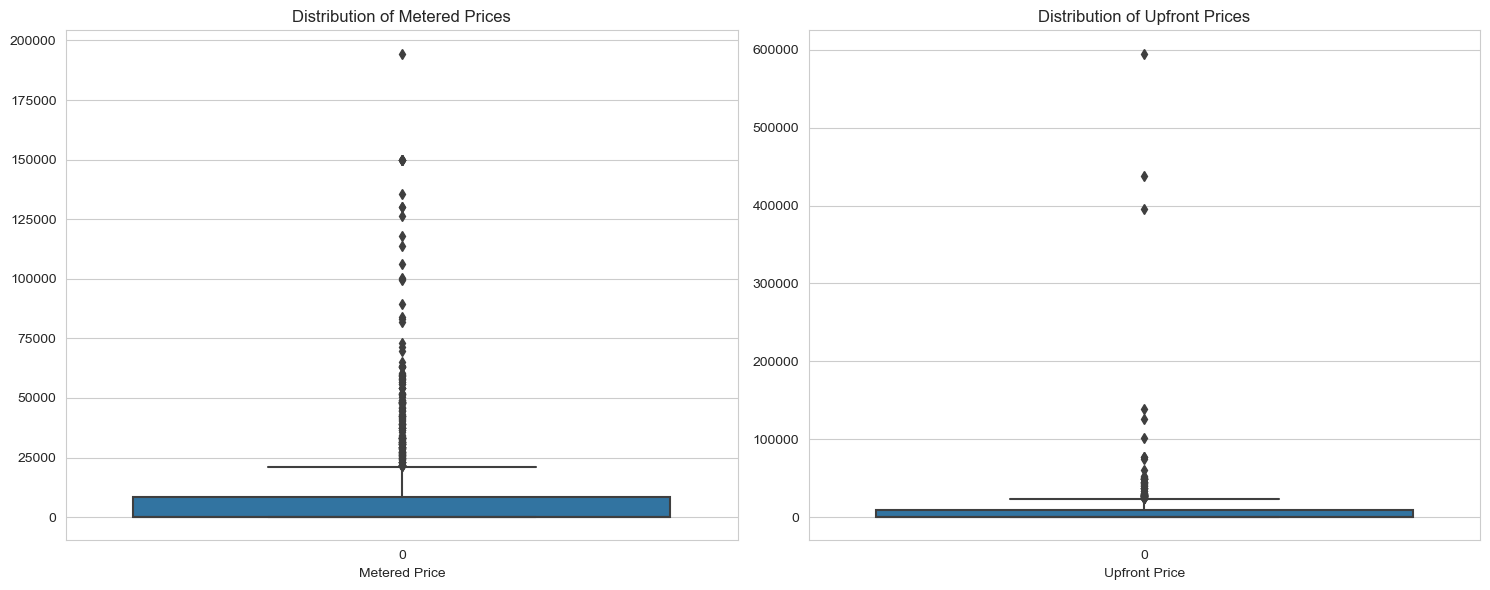

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style
sns.set_style("whitegrid")

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plotting distributions for metered and upfront prices
sns.boxplot(off_by_20['metered_price'], ax=ax[0])
ax[0].set_title('Distribution of Metered Prices')
ax[0].set_xlabel('Metered Price')

sns.boxplot(off_by_20['upfront_price'], ax=ax[1])
ax[1].set_title('Distribution of Upfront Prices')
ax[1].set_xlabel('Upfront Price')

plt.tight_layout()
plt.show()


The boxplots reveals the presence of significant outliers in both metered_price and upfront_price. These outliers can heavily influence the average and other statistics.

For metered_price, while most of the data is clustered close to the lower end of the scale, there are several points (outliers) that are far removed from the main cluster of data.

Similarly, for upfront_price, we see a few extreme values that can heavily skew the overall distribution.

Before making any recommendations, it's essential to address these outliers. They could be due to:
- Genuine extreme cases, such as very long rides.
- Data entry errors or system glitches.
- Fraudulent activities, although the correlation with fraud_score was low.

To understand these outliers better, I can:
- Examine the details of these extreme values.
- Compare the outlier values against other variables to see if there's a pattern or rationale.

**Examining the details of the rides with extremely high metered_price and upfront_price** 
I'll check the top 1% of each to understand their characteristics better.

In [19]:
# Extracting the top 1% of metered and upfront prices
top_1_percent_threshold_metered = off_by_20['metered_price'].quantile(0.99)
top_1_percent_threshold_upfront = off_by_20['upfront_price'].quantile(0.99)

# Filtering the data for the top 1% values
high_metered_price_rides = off_by_20[off_by_20['metered_price'] > top_1_percent_threshold_metered]
high_upfront_price_rides = off_by_20[off_by_20['upfront_price'] > top_1_percent_threshold_upfront]

high_metered_price_rides, high_upfront_price_rides


(      order_id_new  order_try_id_new         calc_created  metered_price  \
 482             63                63  2020-02-02 14:25:38      149723.20   
 752            356               356  2020-02-05 16:12:07      113848.46   
 862             63                63  2020-02-02 14:25:38      149723.20   
 1073           655               655  2020-02-08 12:32:37      130164.46   
 1188          1578              1578  2020-02-16 21:31:54      194483.52   
 1198            63                63  2020-02-02 14:25:38      149723.20   
 1314            63                63  2020-02-02 14:25:38      149723.20   
 1731            63                63  2020-02-02 14:25:38      149723.20   
 1911          1482              1482  2020-02-15 20:52:59      126277.60   
 1968           522               522  2020-02-07 15:29:04      106160.00   
 3174          1168              1168  2020-02-13 16:56:58      135556.80   
 3993           102               102  2020-02-02 20:13:44      117810.28   

Analyzing the top 1% of rides with the highest metered_price and upfront_price, I've observed:

**For rides with high Metered Prices:**
- The actual distances (distance) and durations (duration) of these rides are significantly large, suggesting that these might be long-distance rides.
- The upfront_price for these rides is considerably lower than the metered_price, leading to large discrepancies.

**For rides with high Upfront Prices:**
- The upfront_price is significantly higher than the metered_price in most cases.
- The actual distances and durations for these rides are not exceptionally high, suggesting that the high upfront prices might be due to overestimations or errors in the prediction mechanism.

### **Recommendations based on the analysis:**
1. **Review Long-Distance Pricing:** For very long rides, the upfront pricing seems to underestimate the cost consistently. The pricing algorithm might need adjustments or a different strategy for long-distance rides.
2. **Review Overestimations:** For rides where the upfront_price is significantly higher than the metered_price, there might be overestimations in the prediction. This could be due to inaccuracies in mapping or traffic prediction, overestimation of distances, or other factors.

Next steps:
- Investigate why certain rides have such high upfront price predictions when the actual metered prices are much lower.
- Review any feedback or complaints associated with these rides to understand rider and driver perspectives.

## **Visualizations:**
- Distribution of percentage differences between metered and upfront prices
- GPS confidence distribution for rides with >20% price difference
- Destination change number distribution for rides with >20% price difference
- Distribution of metered prices and upfront prices for the top 1% extreme values

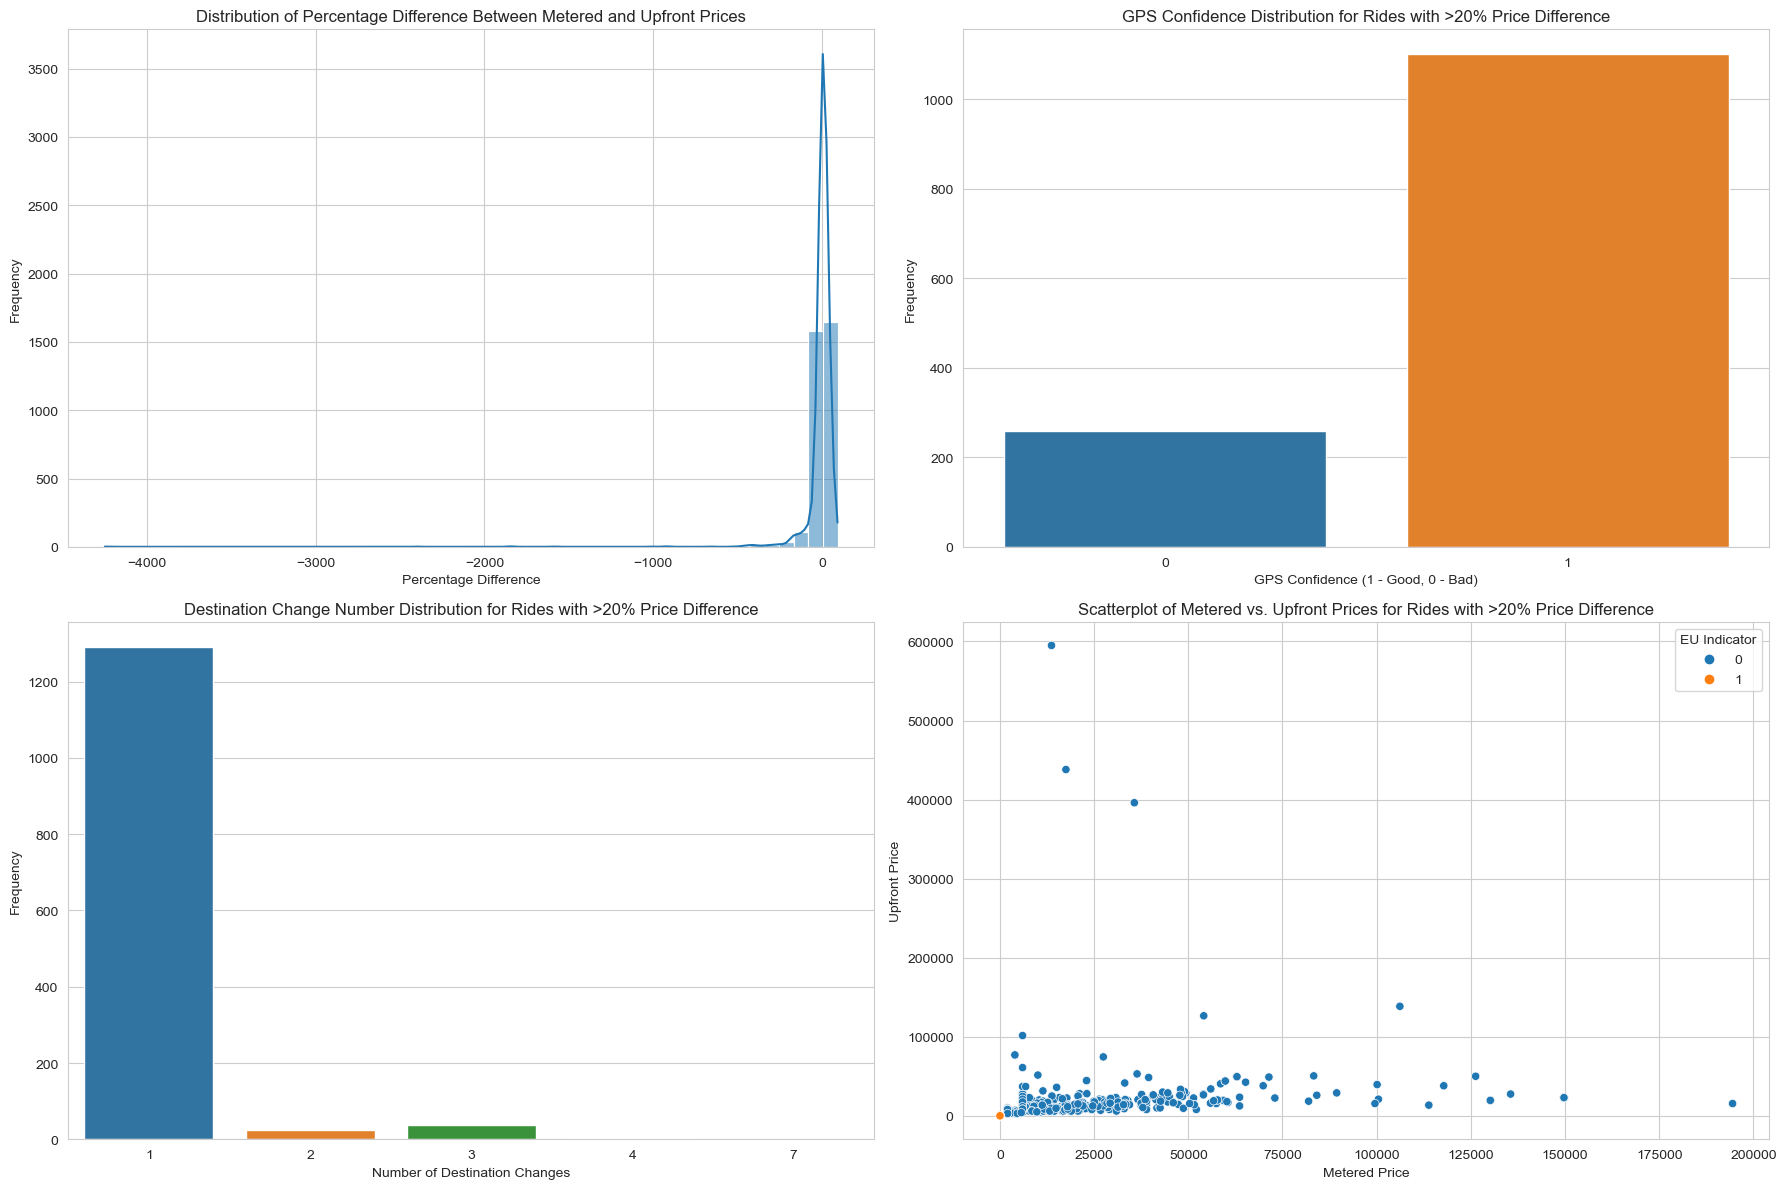

In [20]:
# Setting up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# 1. Distribution of percentage differences
sns.histplot(data['price_difference'], bins=50, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Percentage Difference Between Metered and Upfront Prices')
ax[0, 0].set_xlabel('Percentage Difference')
ax[0, 0].set_ylabel('Frequency')

# 2. GPS confidence distribution for rides with >20% price difference
sns.countplot(data=off_by_20, x='gps_confidence', ax=ax[0, 1])
ax[0, 1].set_title('GPS Confidence Distribution for Rides with >20% Price Difference')
ax[0, 1].set_xlabel('GPS Confidence (1 - Good, 0 - Bad)')
ax[0, 1].set_ylabel('Frequency')

# 3. Destination change number distribution for rides with >20% price difference
sns.countplot(data=off_by_20, x='dest_change_number', ax=ax[1, 0])
ax[1, 0].set_title('Destination Change Number Distribution for Rides with >20% Price Difference')
ax[1, 0].set_xlabel('Number of Destination Changes')
ax[1, 0].set_ylabel('Frequency')

# 4. Distribution of metered prices and upfront prices for the top 1% extreme values
sns.scatterplot(data=off_by_20, x='metered_price', y='upfront_price', hue='eu_indicator', ax=ax[1, 1])
ax[1, 1].set_title('Scatterplot of Metered vs. Upfront Prices for Rides with >20% Price Difference')
ax[1, 1].set_xlabel('Metered Price')
ax[1, 1].set_ylabel('Upfront Price')
ax[1, 1].legend(title='EU Indicator')

plt.tight_layout()
plt.show()


**Visualization Insights:**
- ***Percentage Difference Distribution:*** Most rides cluster around 0%, but there's a noticeable spread, especially towards negative values. This indicates that the upfront prices are often lower than the metered prices.
- ***GPS Confidence:*** Majority of the rides with more than 20% price difference have good GPS confidence, suggesting that GPS issues aren't a primary cause for the discrepancy.
- ***Destination Change Number:*** Most of the rides with significant price differences had only one destination change, indicating that frequent changes aren't a significant factor.
- ***Scatterplot of Metered vs. Upfront Prices:*** The scatterplot shows that many rides had a higher upfront price than the metered price. The EU indicator hue helps differentiate between rides inside and outside the EU.